## Furniture Company -  Version 0

This is the first version of the furniture company problem.
All values are arbitrary and will get examined in this notebook.

This example generates a linear problem to simulate a year of the furniture company.
After that the optimal solution will be reviewed and Agents will solve the problem.

The notebook can be used as a template for different combinations of a model.


### Problem

+ Each chair requires
    + 1 wood, 1 metal
    + 2 hours of production time in A and 1 hour in B
+ Each desk requires
    + 2 wood, 1 metal
    + 3 hours of production time in A and 1 hour in B

+ Each bed requires 
    + 2 wood, 1 metal
    + 1 hour of production time in C and 2 hours in D

+ Each bookcase requires
    + 3 wood, 1 metal
    + 3 hours of production time in C and 1 hour in D

The profit of each product changes over the year, have a look at the profit variables
    
There are four workshops available, workshop A, B, C and D.
 
Available hours per month are:
+ 120 for A
+ 50 for B
+ 150 for C
+ 100 for D

Available materials change per month.




## Model

In [1]:
# This is used to import the modules from the experiment folder
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
# First the model builder functionality needs to be imported.
from model_builder import Item, ModelBuilder

In [2]:
# These values are needed to build the model

# define the profit per month for each item:

chair_profit = [3,3,4,3,2,2,3,3,4,2,3,4]
table_profit = [4,3,5,3,5,4,4,5,4,4,3,4]
bed_profit = [4,5,4,4,3,3,4,5,4,4,3,5]
bookcase_profit = [7,6,8,7,7,7,8,7,6,6,8,7]

# define the items:
chair = Item(costs_wood=1,costs_metal=1,costs_time_one=2,costs_time_two=1,profit=chair_profit)
table = Item(2,1,3,1,table_profit)
bed = Item(2,1,1,2, bed_profit)
bookcase = Item(3,1,3,1,bookcase_profit)

# Making calculations for one year
months = 12
# specifying available materials
avail_hours_a = 120
avail_hours_b = 50
avail_hours_c = 150
avail_hours_d = 100
avail_wood = [30,49,56,33,40,60,55,70,62,30,24,80]
avail_metal = [24,30,40,19,42,44,36,29,22,13,20,60]

In [3]:
# Set up the model builder: 
model_builder = ModelBuilder(months=months, avail_wood=avail_wood, avail_metal=avail_metal
                            , avail_hours_a=avail_hours_a,avail_hours_b=avail_hours_b
                            , avail_hours_c=avail_hours_c,avail_hours_d=avail_hours_d
                            , chair=chair,table=table, bed=bed, bookcase=bookcase)
# build the model:
model = model_builder.build_model()


In [ ]:
# Save the model to export a game
# model_builder.save_model('model_v0')

## Random Agent
This agent solves the problem by randomly picking affordable items and producing a random number of the chosen item until nothing more can be produced. 

In [4]:
# importing a random agent
from agents import RandomAgent

In [5]:
agents = []
# create the random agent by passing the model
a = RandomAgent(model)
# Step through every month with the strategy of the agent
a.simulate_year()
agents.append(a)

In [41]:
import numpy as np
random_agents = []
for i in range(500):
    r = RandomAgent(model)
    r.simulate_year()
    random_agents.append(r)

mean_profits = [int(np.round(np.mean([agent.profits[i] for agent in random_agents]))) for i in range(12)]
print('Mean Profit of random agent: ', sum(mean_profits))
print('Optimal Solution Profit: ', sum(random_agents[0].optimal_solution.profits))

Mean Profit of random agent:  1274
Optimal Solution Profit:  1581


In [9]:
a.print_profits()

Agent solution:  1276
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,70,108,139,67,88,120,136,161,92,50,49,196


Optimal solution:  1581
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,84,128,192,85,100,140,155,169,128,60,70,270


### Plots

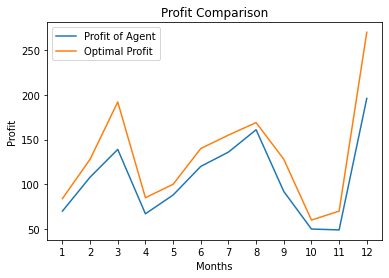

In [10]:
# Plot the profit for each month of the agent compared to the optimal solution
a.plot_profits()

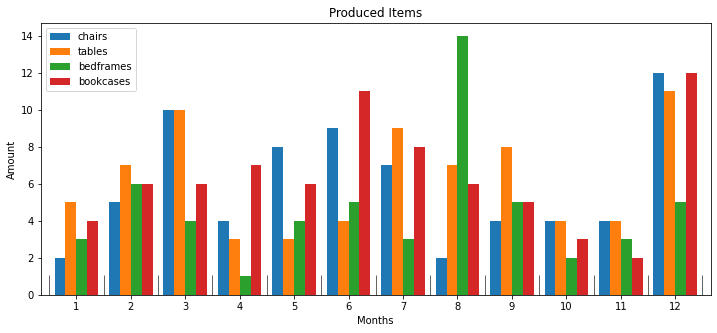

In [6]:
# Show the amount of produced items per month for the agent
a.plot_produced_items()

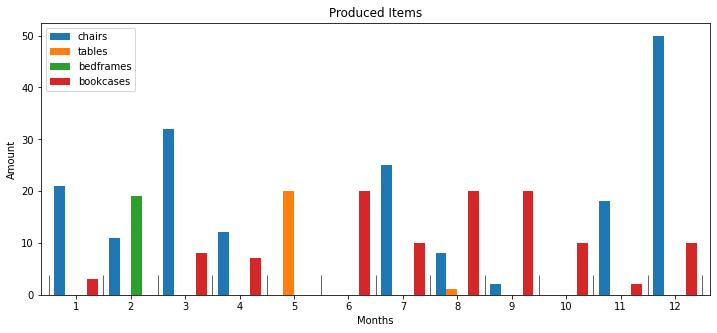

In [7]:
# Show the amount of produced items per month from the optimal solution
a.plot_produced_items(a.optimal_solution)

## Random Agent (all-in)
This agent builds the maximum amount of a random item.

In [12]:
from agents import RandomAgentAllIn
all_in = RandomAgentAllIn(model)
all_in.simulate_year()
agents.append(all_in)


In [42]:
import numpy as np
random_agents = []
for i in range(500):
    r = RandomAgentAllIn(model)
    r.simulate_year()
    random_agents.append(r)

mean_profits = [int(np.round(np.mean([agent.profits[i] for agent in random_agents]))) for i in range(12)]
print('Mean Profit of random all in agent: ', sum(mean_profits))
print('Optimal Solution Profit: ', sum(random_agents[0].optimal_solution.profits))

Mean Profit of random all in agent:  1209
Optimal Solution Profit:  1581


Agent solution:  1151
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,70,90,140,77,100,90,111,87,88,52,60,186


Optimal solution:  1581
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,84,128,192,85,100,140,155,169,128,60,70,270


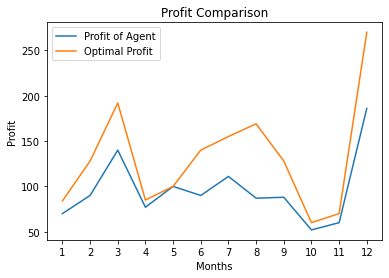

In [13]:
all_in.print_profits()
all_in.plot_profits()

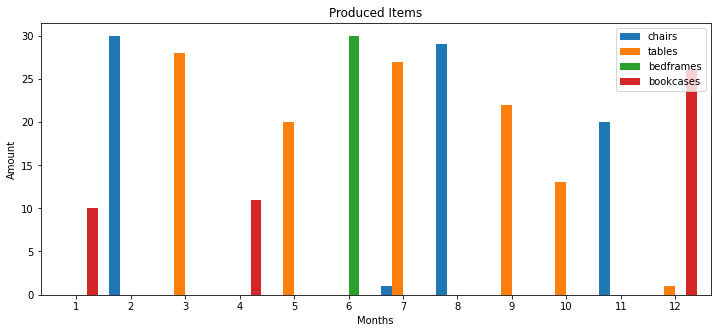

In [14]:
all_in.plot_produced_items()

## ExpensiveMaterialAgent
This agent builds the products that have the highest costs first.
It does not make any differences between the costs, they are all recieve the same weight.

In [8]:
from agents import ExpensiveMaterialAgent

In [9]:
e = ExpensiveMaterialAgent(model)
e.simulate_year()
agents.append(e)

In [17]:
# Compare the agent profit with the optimal solution
e.print_profits()

Agent solution:  1373
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,70,99,149,77,93,140,147,164,124,60,64,186


Optimal solution:  1581
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,84,128,192,85,100,140,155,169,128,60,70,270


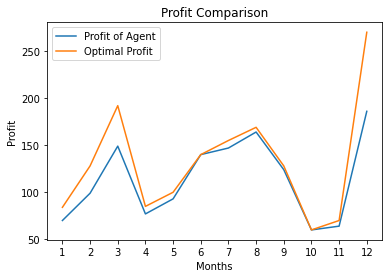

In [18]:
e.plot_profits()

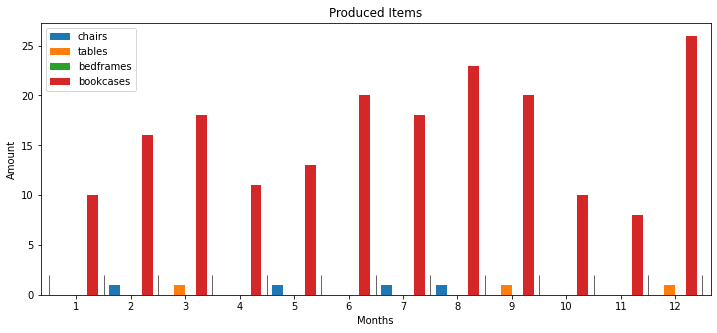

In [10]:
e.plot_produced_items()

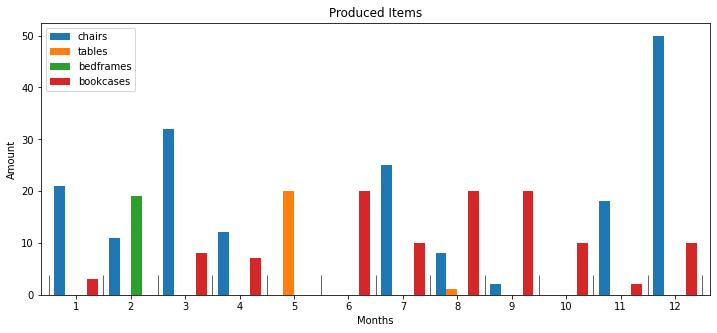

In [11]:
e.plot_produced_items(e.optimal_solution)

## NaiveProfitAgent
This agent builds the products that promise the most profit first.
It does not consider any costs.

In [12]:
from agents import NaiveProfitAgent
c = NaiveProfitAgent(model)
c.simulate_year()
agents.append(c)

In [23]:
c.print_profits()

Agent solution:  1378
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,70,99,149,77,93,140,147,164,128,60,64,187


Optimal solution:  1581
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,84,128,192,85,100,140,155,169,128,60,70,270


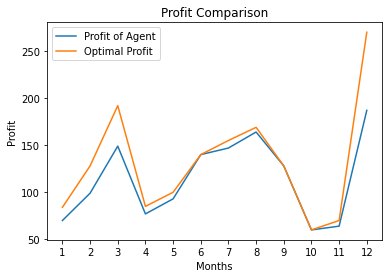

In [24]:
c.plot_profits()

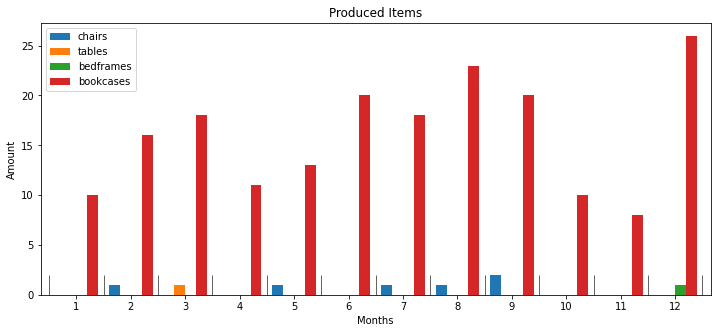

In [13]:
c.plot_produced_items()

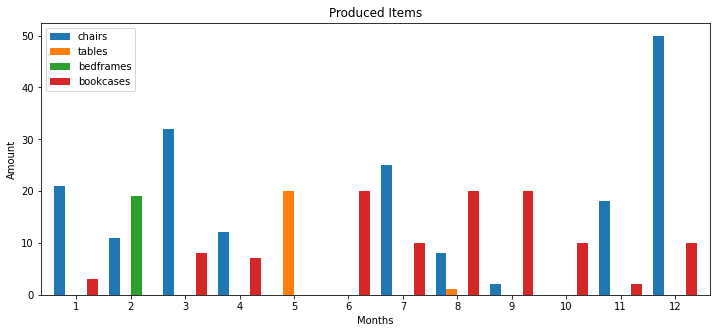

In [26]:
c.plot_produced_items(c.optimal_solution)

## MarginProfitAgent
This agent behaves the same as the naive profit agent but considers the costs of the items

In [27]:
from agents import MarginProfitAgent

In [28]:
margin_agent = MarginProfitAgent(model)
margin_agent.simulate_year()
agents.append(margin_agent)

In [29]:
margin_agent.print_profits()

Agent solution:  1401
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,70,123,152,77,93,140,147,145,88,52,64,250


Optimal solution:  1581
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,84,128,192,85,100,140,155,169,128,60,70,270


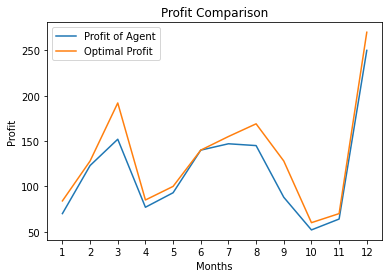

In [30]:
margin_agent.plot_profits()

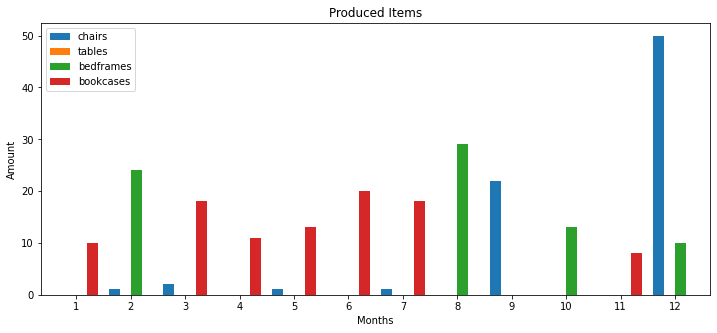

In [31]:
margin_agent.plot_produced_items()

In [ ]:
margin_agent.plot_produced_items(margin_agent.optimal_solution)

## Compare Agents

In [32]:
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display

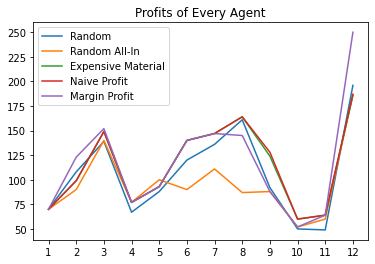

In [33]:
# Compare the profits of each agent
for a in agents:
    plt.plot(range(1,13), a.profits)
plt.legend([a.name for a in agents])
plt.title('Profits of Every Agent')
plt.xticks(range(1,13))
plt.show()

,Profit
Random,1276
Random All-In,1151
Expensive Material,1373
Naive Profit,1378
Margin Profit,1401


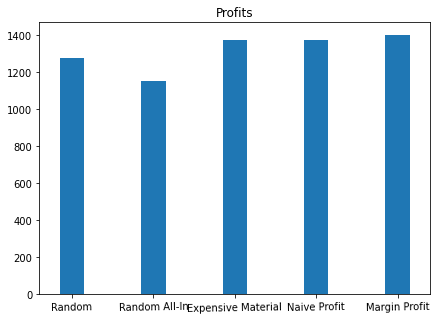

In [34]:
sums = [sum(a.profits) for a in agents]
df = pd.DataFrame(sums, index=[a.name for a in agents])
df.columns = ['Profit']
display(df)
df.plot(kind='bar', legend=False,width=0.3,figsize=(7,5),rot=1,title='Profits')
plt.show()

## Review variation between items built
In this section the variation coefficient is used to compare the items built

In [35]:
from agents import stats
optimal_solution = RandomAgent(model).optimal_solution
variation_between_items = [stats.get_distributed_variation(optimal_solution, m) for m in range(12)]
variation_each_item = [stats.get_month_variation(optimal_solution, k) for k in optimal_solution.produced_items.keys()]

In [36]:
variation_between_items

[1.457737973711325,
 1.0687479694587598,
 1.3114877048604001,
 1.0670071017217524,
 1.7320508075688774,
 1.7320508075688774,
 1.1693361102674928,
 1.1007510137594736,
 1.529327621932793,
 1.7320508075688774,
 1.50996688705415,
 1.3743685418725535]

In [37]:
variation_each_item

[0.9823987003207052, 3.148263747822018, 3.3166247903554007, 0.782663390910214]